In [1]:
import numpy as np
import pandas as pd
import seaborn as sb 
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("G:\Extra SEMESTER\ML with Python\Admission_Predict_1.csv")
print(df.shape)
print(df.info())

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB
None


In [7]:
print(df[df['Chance of Admit']=='yes'].count())

Serial No.           218
GRE Score            218
TOEFL Score          218
University Rating    218
SOP                  218
LOR                  218
CGPA                 218
Research             218
Chance of Admit      218
dtype: int64


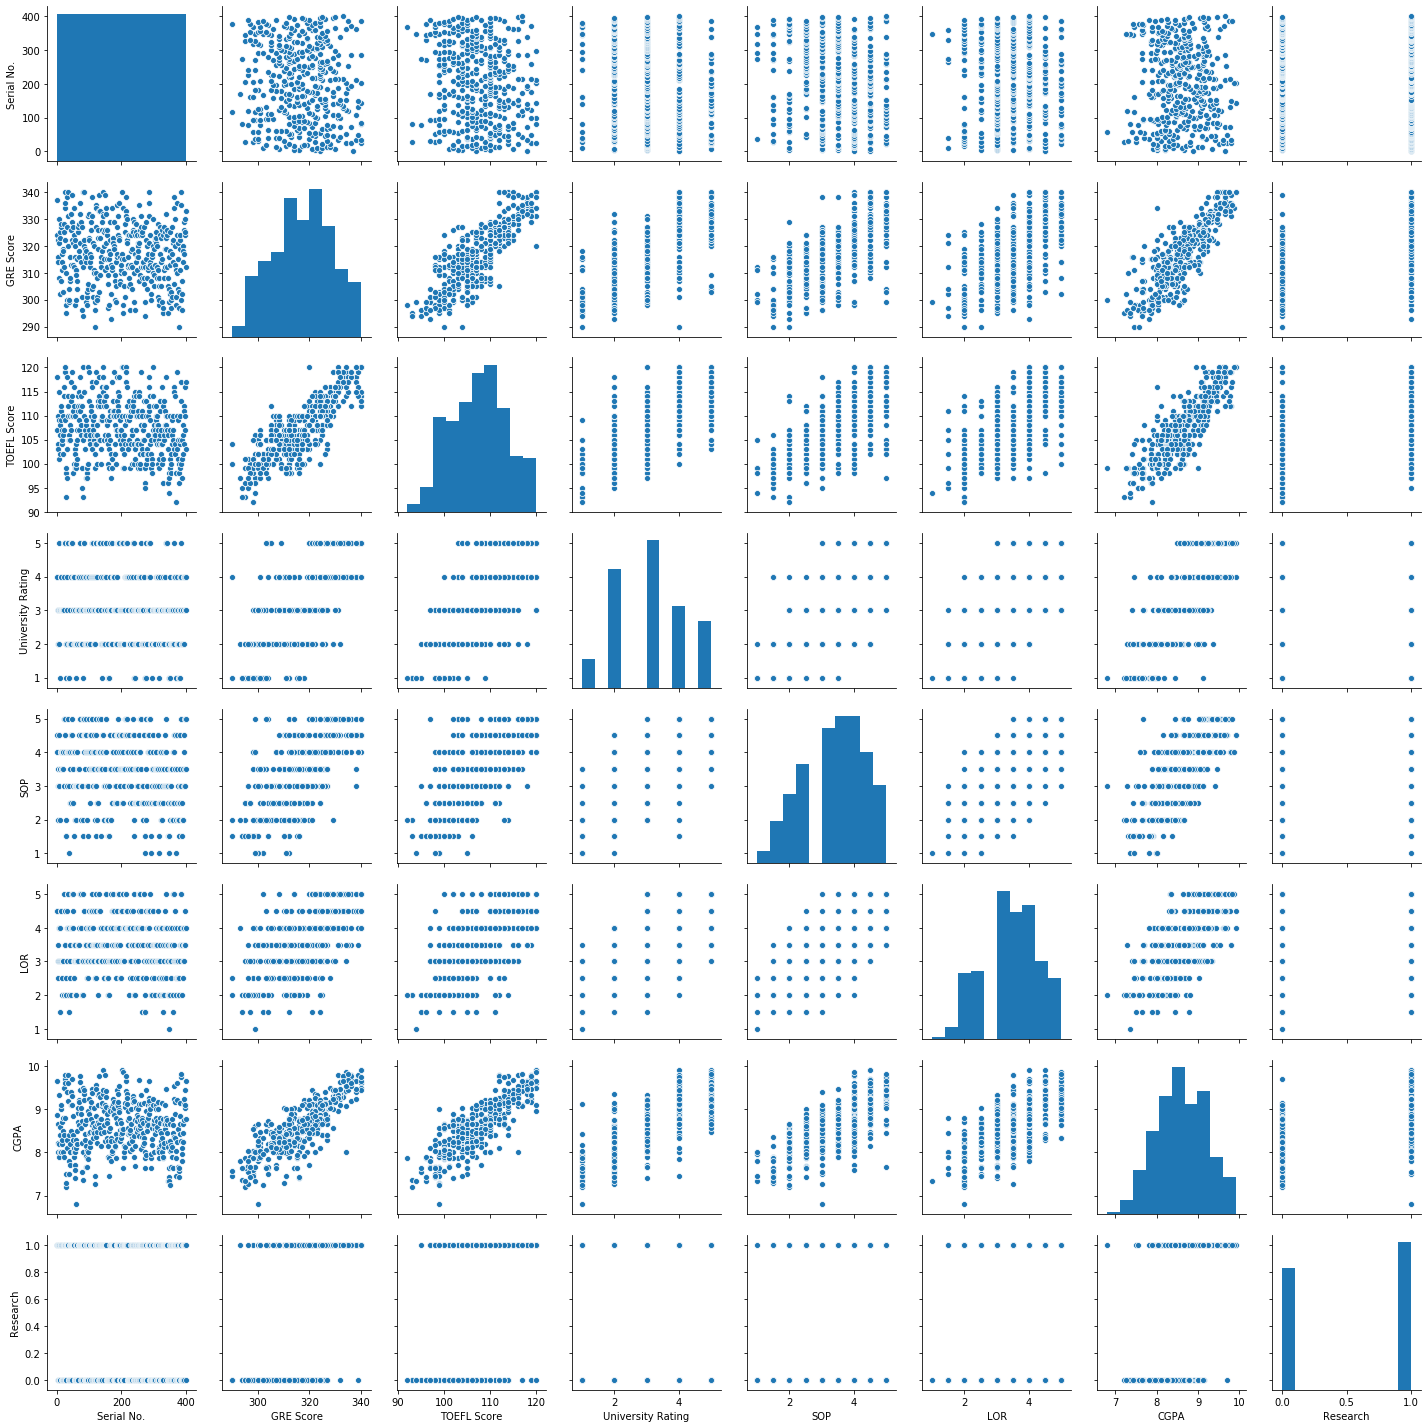

In [10]:
#DRAW SCTTER PLOT
sb.pairplot(df)

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   

                        SOP       LOR      CGPA  Research  
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138  
GRE Score          0.612831  0.557555  0.833060  0.580391  
TOEFL Score        0.657981  0.567721  0.828417  0.489858  
University Rating  0.734523  0.660123  0.746479  0.447783  
SOP            

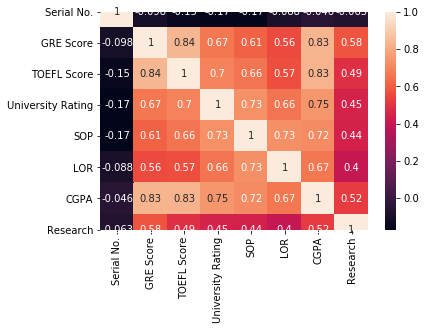

In [11]:
df1=df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [12]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,yes
1,324,107,4,4.0,4.5,8.87,1,yes
2,316,104,3,3.0,3.5,8.00,1,yes
3,322,110,3,3.5,2.5,8.67,1,yes
4,314,103,2,2.0,3.0,8.21,0,no


In [13]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [16]:
#INPUT OUTPUT SPLITTING
from sklearn import linear_model
regress = linear_model.LogisticRegression()
df2=df.values
print(df2)
train_x=(df2[:,0:6])
train_y=df2[:,7]
print(train_x.shape)
print(train_y.shape)

[[337 118 4 ... 9.65 1 'yes']
 [324 107 4 ... 8.87 1 'yes']
 [316 104 3 ... 8.0 1 'yes']
 ...
 [330 116 4 ... 9.45 1 'yes']
 [312 103 3 ... 8.78 0 'no']
 [333 117 4 ... 9.66 1 'yes']]
(400, 6)
(400,)


In [17]:
#MINMAX NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
train_x=ms.fit_transform(train_x)
print(train_x)

[[0.94       0.92857143 0.75       0.875      0.875      0.91346154]
 [0.68       0.53571429 0.75       0.75       0.875      0.66346154]
 [0.52       0.42857143 0.5        0.5        0.625      0.38461538]
 ...
 [0.8        0.85714286 0.75       1.         0.875      0.84935897]
 [0.44       0.39285714 0.5        0.625      0.75       0.63461538]
 [0.86       0.89285714 0.75       1.         0.75       0.91666667]]


In [19]:
regress.fit(train_x,train_y)
print('coefficients:',regress.coef_)
print('intercept:',regress.intercept_)

coefficients: [[3.07020931 0.49918508 0.66206319 0.69805845 0.30165172 0.83968638]]
intercept: [-3.06709531]


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
#prediction
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['pred']=y_predicted
df
df.to_csv("G:\\Extra SEMESTER\\ML with Python\\result.csv")

yes yes
yes yes
yes no
yes yes
no no
yes yes
yes yes
no no
no no
no yes
yes yes
yes yes
yes yes
yes no
yes no
no no
no yes
yes yes
no yes
no no
yes no
no yes
yes yes
yes yes
yes yes
yes yes
no yes
yes no
no no
no no
yes no
yes yes
yes yes
yes yes
yes yes
yes yes
no no
no no
no no
no no
yes no
yes no
yes no
no yes
yes yes
yes yes
yes yes
no yes
yes yes
yes yes
yes no
yes no
yes yes
yes yes
no yes
no yes
no no
no no
yes no
no no
no no
no no
yes no
yes yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
yes yes
yes yes
no no
yes no
no no
yes no
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
no yes
yes yes
yes yes
no no
no no
yes no
no no
no no
no no
yes yes
yes yes
yes yes
yes yes
no no
no no
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes no
no yes
yes no
yes yes
no no
no no
no no
yes yes
yes yes
yes yes
no no
no no
no no
yes no
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
yes yes
yes yes
no yes
yes no
yes 

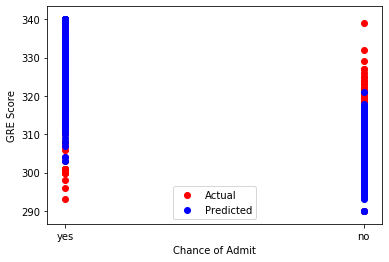

In [25]:
#SCATTER CHART
plt.scatter(df['Chance of Admit'],df['GRE Score'],color='red',label='Actual')
plt.scatter(df['pred'],df['GRE Score'],color='blue',label='Predicted')
plt.xlabel('Chance of Admit')
plt.ylabel('GRE Score')
plt.legend()
plt.show()

In [26]:
#metrics
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(train_y,y_predicted))
print('confusion matrix',metrics.confusion_matrix(train_y,y_predicted))

accuracy: 0.76
confusion matrix [[128  54]
 [ 42 176]]


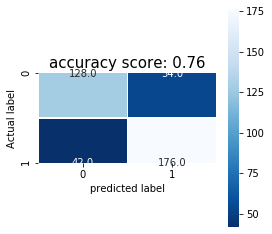

In [28]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(train_y,y_predicted),annot=True,fmt=".1f",linewidths=.90,square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
all_sample_title='accuracy score: {0}'.format(metrics.accuracy_score(train_y,y_predicted))
plt.title(all_sample_title,size=15);

In [29]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

              precision    recall  f1-score   support

          no       0.75      0.70      0.73       182
         yes       0.77      0.81      0.79       218

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400

